Link Dataset : https://drive.google.com/uc?export=download&id=1u17iBTeIDrv4zikfQyghXK48spU_1_Oi

# Import Libary

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Membaca Dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Portofolio/SentimenAnalysis/IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
df.info() # membaca info dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


# Pembersihan Data
* Menghapus tanda baca.
* Mengubah teks menjadi huruf kecil.
* Menghapus angka atau karakter yang tidak relevan.

In [4]:
# Fungsi untuk membersihkan teks
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Hapus HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Hapus angka dan tanda baca
    text = text.lower()  # Ubah ke huruf kecil
    text = text.split()
    return ' '.join(text)

# Terapkan pembersihan pada kolom ulasan
df['cleaned_review'] = df['review'].apply(clean_text)

# Tampilkan hasil pembersihan
print("\nContoh Teks Setelah Dibersihkan:")
print(df[['review', 'cleaned_review']].head())


Contoh Teks Setelah Dibersihkan:
                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review  
0  one of the other reviewers has mentioned that ...  
1  a wonderful little production the filming tech...  
2  i thought this was a wonderful way to spend ti...  
3  basically there s a family where a little boy ...  
4  petter mattei s love in the time of money is a...  


# Membagi Data untuk Training dan Testing

In [5]:
# Pisahkan fitur (teks) dan target (sentimen)
X = df['cleaned_review']
y = df['sentiment'].map({'positive': 1, 'negative': 0})  # Encode sentimen

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData telah dibagi:")
print(f"Training set: {len(X_train)}")
print(f"Testing set: {len(X_test)}")


Data telah dibagi:
Training set: 40000
Testing set: 10000


# Ubah Teks Menjadi Angka

In [6]:
# Buat objek CountVectorizer
vectorizer = CountVectorizer(max_features=5000)  # Gunakan hingga 5000 fitur kata

# Transformasikan teks menjadi angka
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

print("\nContoh fitur setelah vectorization:")
print(X_train_vectorized.toarray()[:5])


Contoh fitur setelah vectorization:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


proses mengubah teks menjadi angka, yang merupakan langkah penting dalam analisis data berbasis teks. Komputer tidak dapat langsung memahami teks, sehingga kita perlu mengonversinya menjadi bentuk numerik menggunakan teknik seperti CountVectorizer.

# Membangun Model dan Melakukan Prediksi

In [7]:
# Latih model Logistic Regression
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# Lakukan prediksi pada data testing
y_pred = model.predict(X_test_vectorized)

# Evaluasi model
print("\nAkurasi Model:")
print(accuracy_score(y_test, y_pred))

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Akurasi Model:
0.8857

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      4961
           1       0.88      0.89      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Prediksi pada Data Baru

In [11]:
new_reviews = ["The movie was absolutely fantastic! Loved every bit of it.",
               "The plot was terrible and acting was worse."]

# Bersihkan ulasan baru
cleaned_reviews = [clean_text(review) for review in new_reviews]

# Transformasikan ulasan baru
new_reviews_vectorized = vectorizer.transform(cleaned_reviews)

# Prediksi sentimen
predictions = model.predict(new_reviews_vectorized)
predicted_labels = ["Positive" if p == 1 else "Negative" for p in predictions]

# Tampilkan hasil
for review, label in zip(new_reviews, predicted_labels):
    print(f"Review: {review}")
    print(f"Sentiment: {label}")
    print()

Review: The movie was absolutely fantastic! Loved every bit of it.
Sentiment: Positive

Review: The plot was terrible and acting was worse.
Sentiment: Negative



# Visualisasi sederhana distribusi sentiment

<ipython-input-9-631fc21c5352>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


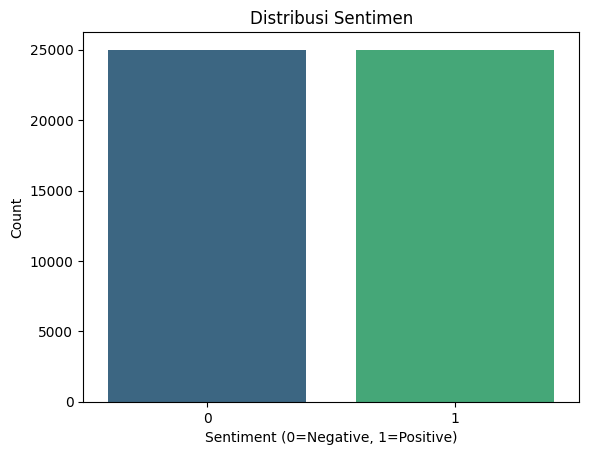

In [9]:
sns.countplot(x=y, palette="viridis")
plt.title("Distribusi Sentimen")
plt.xlabel("Sentiment (0=Negative, 1=Positive)")
plt.ylabel("Count")
plt.show()